In [1]:
# 深度神经网络

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [12]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
for i in range(20):
    model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.001),
              metrics = ["accuracy"])

In [13]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_23 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_24 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_25 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_26 (Dense)             (None, 100)              

In [14]:
print(model.layers)

[<keras.layers.core.Flatten object at 0x7fa48a100668>, <keras.layers.core.Dense object at 0x7fa48a0765c0>, <keras.layers.core.Dense object at 0x7fa47aaf2780>, <keras.layers.core.Dense object at 0x7fa47aafb978>, <keras.layers.core.Dense object at 0x7fa47aafe5f8>, <keras.layers.core.Dense object at 0x7fa47aafee80>, <keras.layers.core.Dense object at 0x7fa47aaf5f98>, <keras.layers.core.Dense object at 0x7fa47ab08588>, <keras.layers.core.Dense object at 0x7fa47ab08ac8>, <keras.layers.core.Dense object at 0x7fa47aafe278>, <keras.layers.core.Dense object at 0x7fa47aaf5278>, <keras.layers.core.Dense object at 0x7fa48a0f2d68>, <keras.layers.core.Dense object at 0x7fa47ab03630>, <keras.layers.core.Dense object at 0x7fa47ab0d160>, <keras.layers.core.Dense object at 0x7fa47ab0def0>, <keras.layers.core.Dense object at 0x7fa47ab0d908>, <keras.layers.core.Dense object at 0x7fa47ab11b00>, <keras.layers.core.Dense object at 0x7fa47ab127b8>, <keras.layers.core.Dense object at 0x7fa47ab03470>, <keras.la

In [17]:
logdir='./dnn_callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file=os.path.join(logdir,'fashion_mnist_model.h5')
callbacks=[
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)
]
history=model.fit(x_train_scaled,y_train,epochs=100,
                  validation_data=(x_valid_scaled,y_valid),
                  callbacks=callbacks)

Epoch 1/100
1719/1719 [==============================] - 6s 3ms/step - loss: 2.3019 - accuracy: 0.1483 - val_loss: 2.3011 - val_accuracy: 0.0976
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3000 - accuracy: 0.1490 - val_loss: 2.2985 - val_accuracy: 0.2832
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 2.2966 - accuracy: 0.2821 - val_loss: 2.2937 - val_accuracy: 0.3194
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 2.2900 - accuracy: 0.3222 - val_loss: 2.2842 - val_accuracy: 0.3358
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 2.2761 - accuracy: 0.3121 - val_loss: 2.2633 - val_accuracy: 0.3008
Epoch 6/100
1719/1719 [==============================] - 5s 3ms/step - loss: 2.2431 - accuracy: 0.2781 - val_loss: 2.2098 - val_accuracy: 0.2876
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 2.1359 - accuracy: 0.2728 - val_loss: 1.9917 - val_ac

In [22]:
print(history.history)

{'loss': [2.3019185066223145, 2.300013542175293, 2.2965993881225586, 2.2900490760803223, 2.276071548461914, 2.243144989013672, 2.135929584503174, 1.672778844833374, 1.063006043434143, 0.8705018758773804, 0.7786107063293457, 0.7290388345718384, 0.6854574084281921, 0.6477971076965332, 0.6153793931007385, 0.590258777141571, 0.5641178488731384, 0.5450039505958557, 0.5239757895469666, 0.5033694505691528, 0.4849136471748352, 0.4663742184638977, 0.4508724510669708, 0.4367324709892273, 0.4225786328315735, 0.41076987981796265, 0.4002300798892975, 0.38955333828926086, 0.3795815408229828, 0.3709504008293152, 0.3630214035511017, 0.35546571016311646, 0.3492334485054016, 0.3415481448173523, 0.3357781171798706, 0.32912710309028625, 0.32367080450057983, 0.31773218512535095, 0.31312650442123413, 0.3074464797973633, 0.30301088094711304, 0.29742535948753357], 'accuracy': [0.14827272295951843, 0.14896363019943237, 0.2820909023284912, 0.3222363591194153, 0.3121090829372406, 0.2780908942222595, 0.2727818191

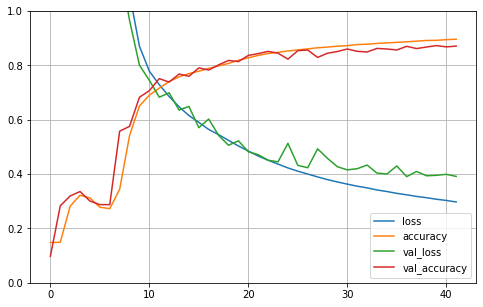

In [23]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)
# 如果初期变化效果不明显 可能的原因：
# 1. 参数众多，训练不充分
# 2. 梯度消失 -> 链式法则 -> 复合函数f(g(x))求导，前期参数太多

In [24]:
print(model.evaluate(x_test_scaled,y_test,verbose=0))

[0.42106470465660095, 0.859499990940094]
